### Data Science
### Módulo 2 _ Machine Learning
### Aprendizaje no supervisado

# Selección de Características 
### `Skillsforindustry.org`

In [21]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
matplotlib.style.use("ggplot")

In [3]:
#Loading the dataset
x = load_boston()
x

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [12]:
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",axis = 1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Definir una X serie nos puede dar problemas a la hora de modelar
df["MEDV"].shape
# mantener la estructura de columnas y renglones
df[["MEDV"]].shape
df["MEDV"].values.reshape((-1,1)) 


(506,)

In [20]:
scaler = StandardScaler()
pd.DataFrame(scaler.fit_transform(df.drop("MEDV",axis = 1)), columns = x.feature_names).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [22]:
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(df.drop("MEDV",axis = 1)), columns = x.feature_names).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Método de Filtro - correlación de Pearson


Como sugiere el nombre, en este método, filtra y toma solo el subconjunto de las características relevantes. El modelo se construye después de seleccionar las características. El filtrado aquí se realiza mediante la matriz de correlación y, más comúnmente, se realiza mediante la correlación de Pearson.
Aquí primero trazaremos el mapa de calor de correlación de Pearson y veremos la correlación de variables independientes con la variable de salida MEDV. Solo seleccionaremos características que tengan una correlación superior a 0.5 (tomando un valor absoluto) con la variable de salida.
El coeficiente de correlación tiene valores entre -1 a 1
- Un valor más cercano a 0 implica una correlación más débil (0 exacto implica que no hay correlación)
- Un valor más cercano a 1 implica una correlación positiva más fuerte
- Un valor más cercano a -1 implica una correlación negativa más fuerte

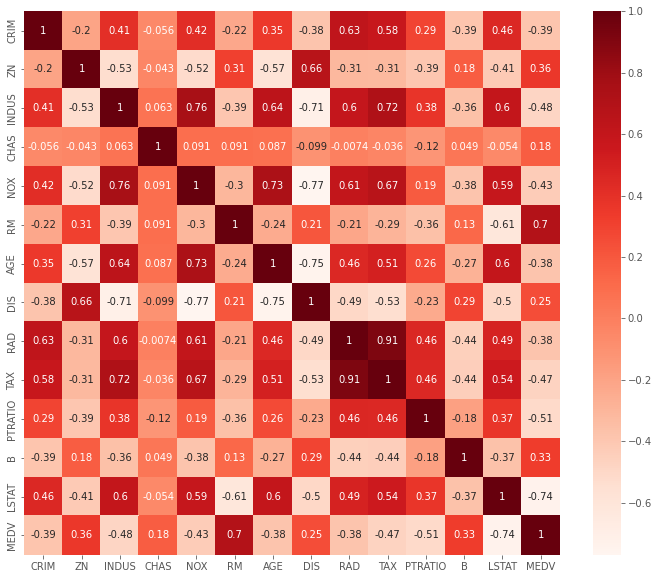

In [24]:
#Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
abs(cor["MEDV"]).sort_values(ascending  = False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [30]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

Como podemos ver, solo las características **RM, PTRATIO y LSTAT** están altamente correlacionadas con la variable de salida MEDV. Por lo tanto, eliminaremos todas las demás características además de estas. Sin embargo, este no es el final del proceso. Uno de los supuestos de la regresión lineal es que las variables independientes deben no estar correlacionadas entre sí. Si estas variables están correlacionadas entre sí, entonces necesitamos mantener solo una de ellas y descartar el resto. Así que comprobemos la correlación de las características seleccionadas entre sí. Esto se puede hacer comprobándolo visualmente desde la matriz de correlación anterior o desde el fragmento de código a continuación.

In [ ]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


A partir del código anterior, se ve que las variables RM y LSTAT están altamente correlacionadas entre sí (-0,613808). Por lo tanto, mantendríamos solo una variable y descartaríamos la otra. Mantendremos LSTAT ya que su correlación con MEDV es mayor que la de RM.
Después de eliminar RM, nos quedamos con dos funciones, LSTAT y PTRATIO. Estas son las características finales dadas por la correlación de Pearson.

## Método de Envoltura (Wrapped) - Backward Elimination

Utiliza su rendimiento como criterio de evaluación. Esto significa que usted alimenta las características al algoritmo de aprendizaje automático seleccionado y, en función del rendimiento del modelo, agrega / elimina las características. Este es un proceso iterativo y computacionalmente costoso, pero es más preciso que el método de filtro.

Como sugiere el nombre, al principio alimentamos todas las características posibles del modelo. **Comprobamos el rendimiento del modelo y luego eliminamos iterativamente las características de peor rendimiento una por una hasta que el rendimiento general del modelo se encuentra en un rango aceptable.**
La métrica de rendimiento que se utiliza aquí para evaluar el rendimiento de las funciones es pvalue. Si el valor de p está por encima de 0.05, eliminamos la característica, de lo contrario, la mantenemos.
Primero ejecutaremos una iteración aquí solo para tener una idea del concepto y luego ejecutaremos el mismo código en un ciclo, que dará el conjunto final de características. Aquí estamos usando el modelo OLS que significa "Mínimos cuadrados ordinarios". Este modelo se utiliza para realizar regresiones lineales.

In [39]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

Como podemos ver, la variable "AGE" tiene el valor de p más alto de 0.9582293, que es mayor que 0.05. Por lo tanto, eliminaremos esta función y crearemos el modelo una vez más. Este es un proceso iterativo y se puede realizar a la vez con la ayuda de loop. Este enfoque se implementa a continuación, lo que daría el conjunto final de variables que son CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B y LSTAT

In [43]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    print(cols)
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    print(feature_with_p_max, pmax)
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
        print("Se elimino", feature_with_p_max)
    else:
        break
selected_features_BE = cols

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
AGE 0.9582293092056888
Se elimino AGE
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
INDUS 0.7379887092915698
Se elimino INDUS
['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
CHAS 0.0015514692639116584


In [46]:
p.idxmax() #retorna el índice con mayor p-value

'CHAS'

In [44]:
print(selected_features_BE)


['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


## Método de Envoltura (Wrapped) - RFE (Recursive Feature Elimination)

El método de Recursive Feature Eliminations (RFE) funciona eliminando atributos de forma recursiva y construyendo un modelo sobre los atributos que quedan. Utiliza métricas de precisión para clasificar la característica según su importancia. El método RFE toma el modelo que se utilizará y el número de características necesarias como entrada. Luego da la clasificación de todas las variables, siendo 1 la más importante. También brinda su apoyo, siendo True una característica relevante y False como característica irrelevante.

In [108]:
model = LinearRegression() # Se puede escoger cualquier estimador
#Initializing RFE model
rfe = RFE(model, 5)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True False False  True False
 False]
[4 6 5 1 1 1 9 1 3 7 1 8 2]


In [102]:
rfe.score(X,y)

0.6336210768240027

In [105]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [109]:
columnas = list(X.columns[rfe.support_]) + ['LSTAT', 'RAD'] # Se agrega la variable con posicion 2
model.fit(X[columnas],y)
model.score(X[columnas], y)

0.7171450343413888

In [71]:
X.columns[rfe.support_]

Index(['CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

Aquí tomamos el modelo LinearRegression con 7 características y RFE dio una clasificación de características como la anterior, pero la selección del número "7" fue aleatoria. Ahora necesitamos encontrar el número óptimo de funciones, para las cuales la precisión es la más alta. Lo hacemos usando el ciclo comenzando con 1 característica y subiendo hasta 13. Luego tomamos la que tiene la mayor precisión.

In [112]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


Como se ve en el código anterior, el número óptimo de características es 10. Ahora alimentamos 10 como número de características a RFE y obtenemos el conjunto final de características dado por el método RFE, de la siguiente manera:

In [113]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


## Métodos Híbridos 

estos métodos son iterativos en un sentido que se encarga de cada iteración del proceso de entrenamiento del modelo y extrae cuidadosamente aquellas características que más contribuyen al entrenamiento para una iteración particular. Los métodos de regularización son los métodos integrados más comúnmente utilizados que penalizan una característica dado un umbral de coeficiente.
Aquí haremos la selección de características usando la regularización de Lasso. Si la característica es irrelevante, Lasso penaliza su coeficiente y lo convierte en 0. Por lo tanto, las características con coeficiente = 0 se eliminan y el resto se toma.

In [114]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

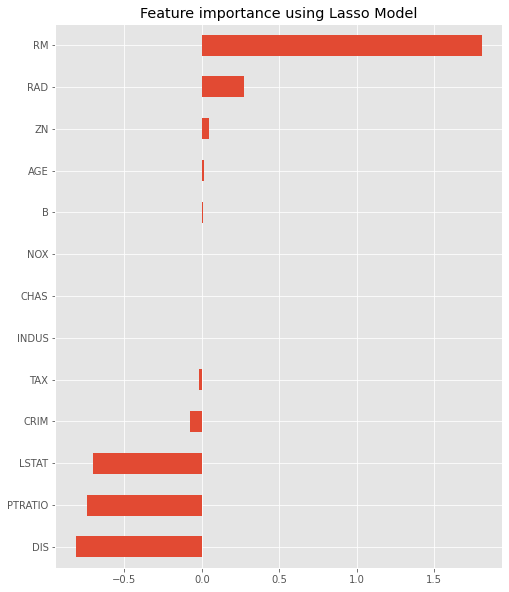

In [115]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Aquí el modelo Lasso ha tomado todas las características excepto NOX, CHAS e INDUS.

## Conclusión 

We saw how to select features using multiple methods for Numeric Data and compared their results. Now there arises a confusion of which method to choose in what situation. Following points will help you make this decision.
* Filter method is less accurate. It is great while doing EDA, it can also be used for checking multi co-linearity in data.
* Wrapper and Embedded methods give more accurate results but as they are computationally expensive, these method are suited when you have lesser features (~20).